# Performing an anti join

In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The top_cust and employees tables have been provided for you.

* Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.
* Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.
* Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

 You performed an anti join by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that there are five employees not supporting top customers. Anti joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

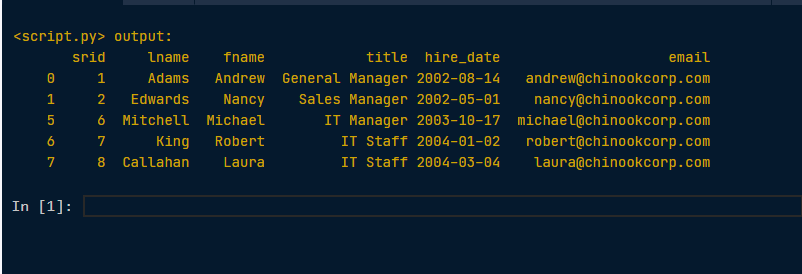

**Performing a semi join**

Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.


* Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.
* Use .isin() to subset the rows of non_mus_tcks where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
* Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
* Merge cnt_by_gid with the genres table on gid and print the result.

In [ ]:
# Merge the non_mus_tcks and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on = "tid" )

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid': 'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on ="gid"))

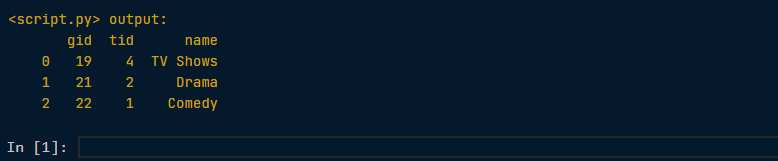